In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { //This functions disables the scroll
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Imports
import os
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plot
import matplotlib.dates as md
import numpy as np
from dateutil import tz #Used to get time zone


In [3]:
#Constants
TIME_ZONE = tz.gettz('America/Cambridge');
SENSOR_DATA_DIR = 'sensor_data'
NO_OF_DIRECTORIES_TO_READ = -1 #-1 will go for all directories except last one

#Dictionary Containting Sensors Constants
dict_vars = {'TEMP': {'filename':'TEMP.csv', 'names':['TEMP'], 'min':24.0, 'max':43.0,'gap':0.24}, # names, min, max
              'IBI':{'filename':'IBI.csv', 'names':['IBI'], 'min':0.6, 'max':1.26},# Experimental
              'HR': {'filename':'HR.csv', 'names':['HR'], 'min':35.0, 'max':200.0},# Experimental
              'EDA':{'filename':'EDA.csv', 'names':['EDA'], 'min':1.0, 'max':20.0},# GSR
              'BVP':{'filename':'BVP.csv', 'names':['BVP'], 'min':35.0, 'max':200.0},#Experimental
              'ACC':{'filename':'ACC.csv', 'names':['ACC_x','ACC_y','ACC_z'], 'min':None, 'max':None}
             }

#Configurations
plot.rcParams['figure.figsize'] = [15, 5]

#Lambdas
TIME_FORMAT = '%I:%M:%S %p'
lambda_str_to_date_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime('%y-%m-%d')
lambda_str_to_time_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime(TIME_FORMAT)


In [4]:
#Getting the directories
def get_list_of_folder_names_inside_dir(dir_name):
    """
    Returns the list of paths of folders in side the provided directory
    
    Keyword arguments:
    dir_name -- the name of the folder to find paths in.
    """
    folder_name_list=[]
    for root, dirs, files in os.walk(dir_name):
        folder_name_list.append(root)
        #print(root, end="\n")
        #print(sum(getsize(join(root, name)) for name in files), end=" ")
        #print("bytes in", len(files), "non-directory files")
    return folder_name_list[1:] #Returning names except root directory

#Getting Sensor Data Folders
sensor_data_folders_name_list = get_list_of_folder_names_inside_dir(SENSOR_DATA_DIR)
print("Number of folders: ",len(sensor_data_folders_name_list), end = '\n')
print("Displaying names of Folders:\n")
print(sensor_data_folders_name_list)

Number of folders:  103
Displaying names of Folders:

['sensor_data\\A010e9_170413-003439', 'sensor_data\\A010e9_170417-154337', 'sensor_data\\A010e9_170420-130630', 'sensor_data\\A010e9_170421-001318', 'sensor_data\\A010e9_170421-133357', 'sensor_data\\A010e9_170422-121529', 'sensor_data\\A010e9_170422-172924', 'sensor_data\\A010e9_170423-024315', 'sensor_data\\A010e9_170423-151800', 'sensor_data\\A010e9_170423-215035', 'sensor_data\\A010e9_170424-013505', 'sensor_data\\A010e9_170425-153257', 'sensor_data\\A010e9_170425-170627', 'sensor_data\\A010e9_170426-033400', 'sensor_data\\A010e9_170427-023310', 'sensor_data\\A010e9_170428-140616', 'sensor_data\\A010e9_170428-175123', 'sensor_data\\A010e9_170429-115559', 'sensor_data\\A010e9_170501-133356', 'sensor_data\\A010e9_170502-131606', 'sensor_data\\A010e9_170505-133418', 'sensor_data\\A010e9_170510-020112', 'sensor_data\\A01119_170412-152301', 'sensor_data\\A01119_170422-144412', 'sensor_data\\A0111b_170405-145139', 'sensor_data\\A0111b

In [5]:
#Reading Temperature Data from Directories
def get_indexed_dataframe_from_file(dir_name, dict_var):
     df_temp = pd.read_csv(dir_name + "/" + dict_var['filename'], names = dict_var['names'])#Reading one directory file
     initial_time = df_temp.iloc[0][0] #Getting initial time from file
     frequency = df_temp.iloc[1][0] #Getting frequency
     delta_time = 1/frequency #Converting frequency to time seconds

     print("File name: ", dir_name, "/", dict_var['filename'],", Initial Time: ",initial_time, ", Frequency: ",frequency,
           ", No of Rows: ",df_temp.shape[0])
     df_temp.drop([0,1],inplace = True) #Deleting Initial time and frequency

     time_column = [initial_time + (row_id * delta_time) for row_id in range( df_temp.shape[0])] # init + Δtime * row 
     #print(time_column)
     df_temp.insert(loc = 0 ,column = 'time_stamp', value = time_column) #inserting time column
        
#     time_column = df_temp['time_stamp'].apply(np.floor) # init + Δtime * row 
#     df_temp.insert(loc = 1 ,column = 'time_stamp_cieled', value = time_column) #inserting time column
     
     df_temp.set_index('time_stamp') # Setting timestamp as index
     return df_temp

def get_all_data(dict_var):
#    print("Reading All Files:", dict_var,"\n")
    df_merged = pd.DataFrame() #Creating empty dataframe
    for dir_name in sensor_data_folders_name_list[ 0 : NO_OF_DIRECTORIES_TO_READ ]:
#        print("Reading: ",dir_name)
        df_merged = pd.concat([df_merged, get_indexed_dataframe_from_file(dir_name,dict_var)])
    return df_merged

# Temperature

In [6]:
#Reading Temperature Data
df_temperature = get_all_data(dict_vars['TEMP'])
df_temperature.reset_index(inplace=True,drop=True)
print("\nInitially Data Size: " , df_temperature.shape)

File name:  sensor_data\A010e9_170413-003439 / TEMP.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325826
File name:  sensor_data\A010e9_170417-154337 / TEMP.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1954
File name:  sensor_data\A010e9_170420-130630 / TEMP.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / TEMP.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162274
File name:  sensor_data\A010e9_170421-133357 / TEMP.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320730
File name:  sensor_data\A010e9_170422-121529 / TEMP.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75058
File name:  sensor_data\A010e9_170422-172924 / TEMP.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132634
File name:  sensor_data\A010e9_170423-024315 / TEMP.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  1808

File name:  sensor_data\A012ce_170420-114354 / TEMP.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236962
File name:  sensor_data\A012ce_170421-041235 / TEMP.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330330
File name:  sensor_data\A012ce_170422-122454 / TEMP.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520114
File name:  sensor_data\A012ce_170424-010522 / TEMP.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / TEMP.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386082
File name:  sensor_data\A012ce_170427-031805 / TEMP.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734234
File name:  sensor_data\A012ce_170429-152714 / TEMP.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141730
File name:  sensor_data\A012ce_170430-143057 / TEMP.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows: 

In [7]:
#Visualizing Temperature Data
print("\n\n Displaying 10 heads\n")
df_temperature.head(10)



 Displaying 10 heads



time_stamp    TEMP
0  1.492044e+09  382.18
1  1.492044e+09  382.18
2  1.492044e+09  382.18
3  1.492044e+09  382.18
4  1.492044e+09   33.87
5  1.492044e+09   33.87
6  1.492044e+09   33.87
7  1.492044e+09   33.87
8  1.492044e+09   33.89
9  1.492044e+09   33.89

In [8]:
#As we can see that data is having repeated values so we delete the values which are same contegiously

#ids = []
#for row_id in range(1, df_temperature.shape[0]):
#    if (df_temperature.iloc[row_id]['TEMP'] - df_temperature.iloc[row_id - 1]['TEMP']) == 0:
#        ids.append(row_id)
#df_temperature['match'] = df_temperature.TEMP.diff(df_temperature.TEMP.shift())
#df_temperature.drop(ids,axis = 0, inplace = True)
#df_temperature.drop(,axis = 0, inplace = True)
diff = abs(df_temperature['TEMP'].diff()) #Getting absolute difference between 
df_temp = df_temperature[diff >= dict_vars['TEMP']['gap']] #Removing values whose gap is greater than dict[gap]
df_temp = df_temp.append(df_temperature.iloc[0])#Appending 0 index as it is nan so not included
df_temp.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_temp.reset_index(inplace=True, drop=True)#Resetting indexes
print(df_temp.head(500))
df_temp.describe()

       time_stamp    TEMP
0    1.491404e+09  382.18
1    1.491404e+09   33.18
2    1.491406e+09   32.16
3    1.491407e+09   31.95
4    1.491408e+09   31.03
5    1.491410e+09   30.61
6    1.491410e+09   30.29
7    1.491410e+09   29.81
8    1.491410e+09   29.69
9    1.491410e+09   30.01
10   1.491410e+09   30.05
11   1.491410e+09   29.75
12   1.491410e+09   30.23
13   1.491410e+09   29.81
14   1.491410e+09   29.65
15   1.491410e+09   29.31
16   1.491410e+09   29.49
17   1.491410e+09   29.17
18   1.491412e+09   25.89
19   1.491412e+09   24.21
20   1.491412e+09   24.95
21   1.491412e+09   24.51
22   1.491418e+09   20.69
23   1.491418e+09   20.29
24   1.491418e+09   20.85
25   1.491418e+09   20.57
26   1.491418e+09   20.12
27   1.491418e+09   20.57
28   1.491418e+09   19.53
29   1.491418e+09   20.65
..            ...     ...
470  1.492490e+09   34.83
471  1.492493e+09   34.23
472  1.492493e+09   34.61
473  1.492494e+09   34.43
474  1.492512e+09   32.89
475  1.492512e+09   29.29
476  1.49251

time_stamp          TEMP
count  1.081600e+04  10816.000000
mean   1.495946e+09     33.731861
std    2.180174e+06     34.160074
min    1.491404e+09     14.070000
25%    1.494104e+09     28.570000
50%    1.496278e+09     31.010000
75%    1.497739e+09     32.840000
max    1.500599e+09    382.210000

Number of Rows in Temperature:  10816


time_stamp          TEMP
count  3.273392e+07  3.273392e+07
mean   1.495503e+09  3.174844e+01
std    2.349494e+06  4.882491e+00
min    1.491404e+09  1.203000e+01
25%    1.493329e+09  3.077000e+01
50%    1.495350e+09  3.365000e+01
75%    1.497788e+09  3.493000e+01
max    1.500599e+09  3.822100e+02

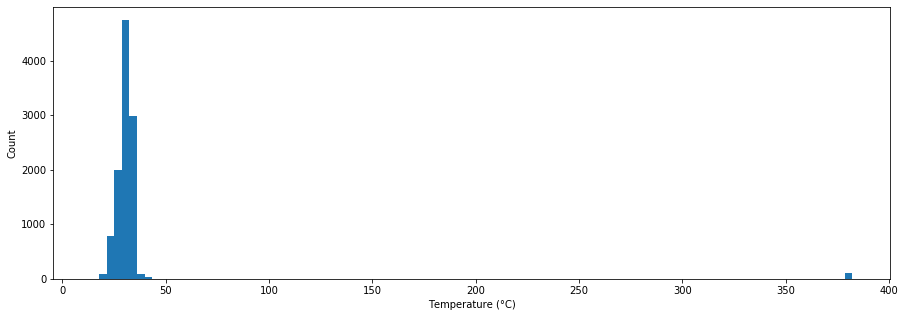

In [9]:
#Checking the frequencies of the data to see different patterns e.g. maximum number of same values, outliers
from collections import Counter

def display_frequency_bar_chart(value_list,xlabel,ylabel, bins = 100):
    plot.hist(value_list,bins = bins)
    plot.ylabel(ylabel)
    plot.xlabel(xlabel)
       
print("Number of Rows in Temperature: ",df_temp.shape[0])
display_frequency_bar_chart(df_temp['TEMP'],"Temperature (°C)","Count")
#df_temp['TEMP'][0:1000].value_counts().plot.bar()
df_temperature.describe()
#df_temp['TEMP'][0:1000]

Keeping Values between:  24.0  and  43.0


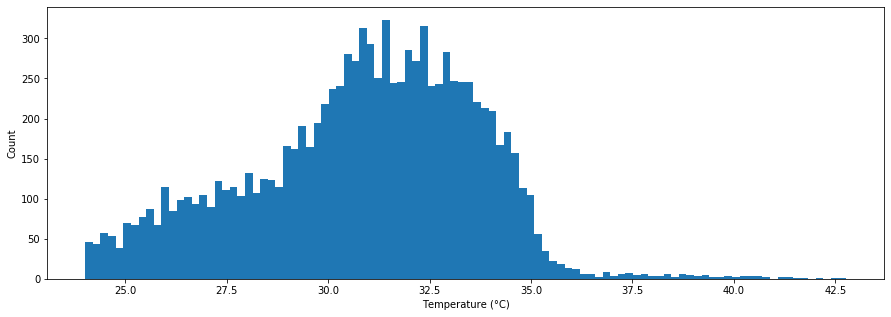

time_stamp   TEMP
1  1.491404e+09  33.18
2  1.491406e+09  32.16
3  1.491407e+09  31.95
4  1.491408e+09  31.03
5  1.491410e+09  30.61

In [10]:
#Deleting outliers
print("Keeping Values between: ",dict_vars['TEMP']['min']," and ",dict_vars['TEMP']['max'])
df_temp = df_temp[(df_temp.TEMP >= dict_vars['TEMP']['min']) &
                                (df_temp.TEMP <= dict_vars['TEMP']['max'])] #Only keeping values lower than 200
display_frequency_bar_chart(df_temp['TEMP'],"Temperature (°C)","Count")
plot.show()
df_temp.describe()
df_temp.head()

time_stamp   TEMP      date         time
1  1.491404e+09  33.18  17-04-05  08:21:40 PM
2  1.491406e+09  32.16  17-04-05  08:52:43 PM
3  1.491407e+09  31.95  17-04-05  09:08:03 PM
4  1.491408e+09  31.03  17-04-05  09:24:13 PM
5  1.491410e+09  30.61  17-04-05  09:58:44 PM

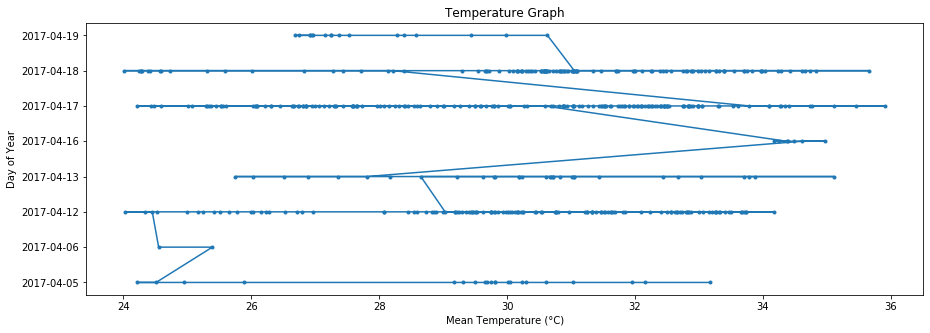

In [11]:

#Displaying Temperature and time graph

READINGS_TO_SHOW = 500 #-1 to display all data except last entry
f_utc2ts_naive = lambda t: datetime.timestamp(datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
def plot_temperature(list_timestamp, temps):
    fig = plot.figure()
    plot.title('Temperature Graph')
    plot.xlabel('Mean Temperature (°C)')
    plot.ylabel('Day of Year') 
    ax = plot.gca()
    formatted_timestamp = list_timestamp
    formatted_timestamp = [datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in list_timestamp]# %H:%M:%S
    plot.plot(temps[0:READINGS_TO_SHOW], formatted_timestamp[0:READINGS_TO_SHOW], marker='.')
    return fig

plot_temperature(df_temp['time_stamp'].values,df_temp['TEMP'])
a=10

df_temp.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_temp['date'] = df_temp['time_stamp'].map(lambda_str_to_date_string)
df_temp['time'] = df_temp['time_stamp'].map(lambda_str_to_time_string)
#df_temp['TEMP'].head()
df_temp.head(5)

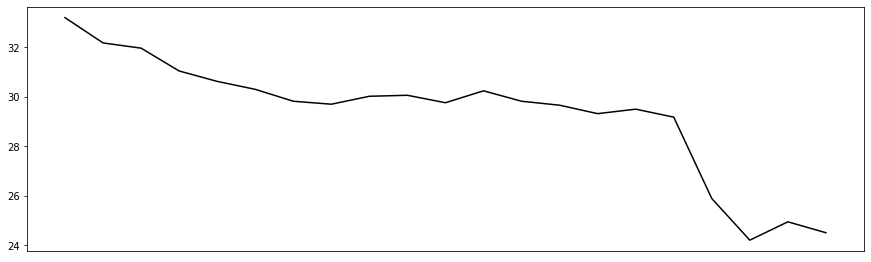

done


In [12]:
#Weekly by furqan
# from datetime import time
# df_temp.head(10)

# df_sub = df_temp
# df_submine=df_temp
# hours = [time(hour = i).strftime(TIME_FORMAT) for i in range(24)]
# # print(hours)
# all_dates = set(df_sub['date'])#Getting all dates
# #  print(all_dates)
# fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)
# df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
# df_sub.head()
# i = 0  #why ???

# df_submine.describe()
#print(df_submine)
# df_submine.head(5)
# df_submine.set_index(pd.to_datetime(df_submine['time']), inplace=True)
# df_submine.resample('15min', how=np.mean)
# print("done")
# df_submine['time'].head(10)

# df.groupby([pd.Grouper(key='time', freq='60min'),'TEMP','date'], as_index=False).size()


# for date in all_dates:
#     df = df_sub[df_sub.date == date]
#     #print(df)
#     #ax.plot(df.time, df.TEMP)
#     df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
# #    print(df)
#     #print(df['TEMP'].values)
#     i=i+1
    
#     if i == 5:
#         i = 0
#         print(date)
#         plot.xticks(rotation='vertical')
#         ax.set_xticks(ax.get_xticks()[::10])
#         ax.set(xlabel="Time", ylabel="Temperature (°C)")
#         plot.savefig('temp_graph_weekly'+str(date)+'.png')
#         plot.show()
#         fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)
#         break


#fig, ax = plot.subplots(figsize=(16,10))
#for label, df in df_sub.groupby('date'):
#    df_sub.plot(x = "time",y = 'TEMP',ax=ax, label=label)
#plot.legend()


#df_temp.head(10)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

idx = pd.date_range('2017-01-01 00:03', '2017-01-01 23:59', freq = 'min')

# df = pd.DataFrame(np.cumsum(np.random.randn(len(idx), 2),0), 
#                   index = idx, columns=list("AB"))


df_sub=df_temp


fig, ax = plt.subplots()
i=0
for date in df_sub['date']:

    df = df_sub[df_sub.date == date]
    
#     df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
    
    if i==1:
#         first = data.loc[["Avery Bradley", "R.J. Hunter"], 
#                    ["Team", "Number", "Position"]]
        ax.plot(df['time'], df["TEMP"], color = 'black')
        hours = mdates.HourLocator(interval = 1)
        h_fmt = mdates.DateFormatter('%H:%M:%S')
        ax.xaxis.set_major_locator(hours)
        ax.xaxis.set_major_formatter(h_fmt)

        fig.autofmt_xdate()
        plt.show()
        print('done')
        break
    i=i+1
    
# ax2 = ax.twinx()
# ax2.plot(df.index, df["B"], color = 'indigo')



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
17-06-07


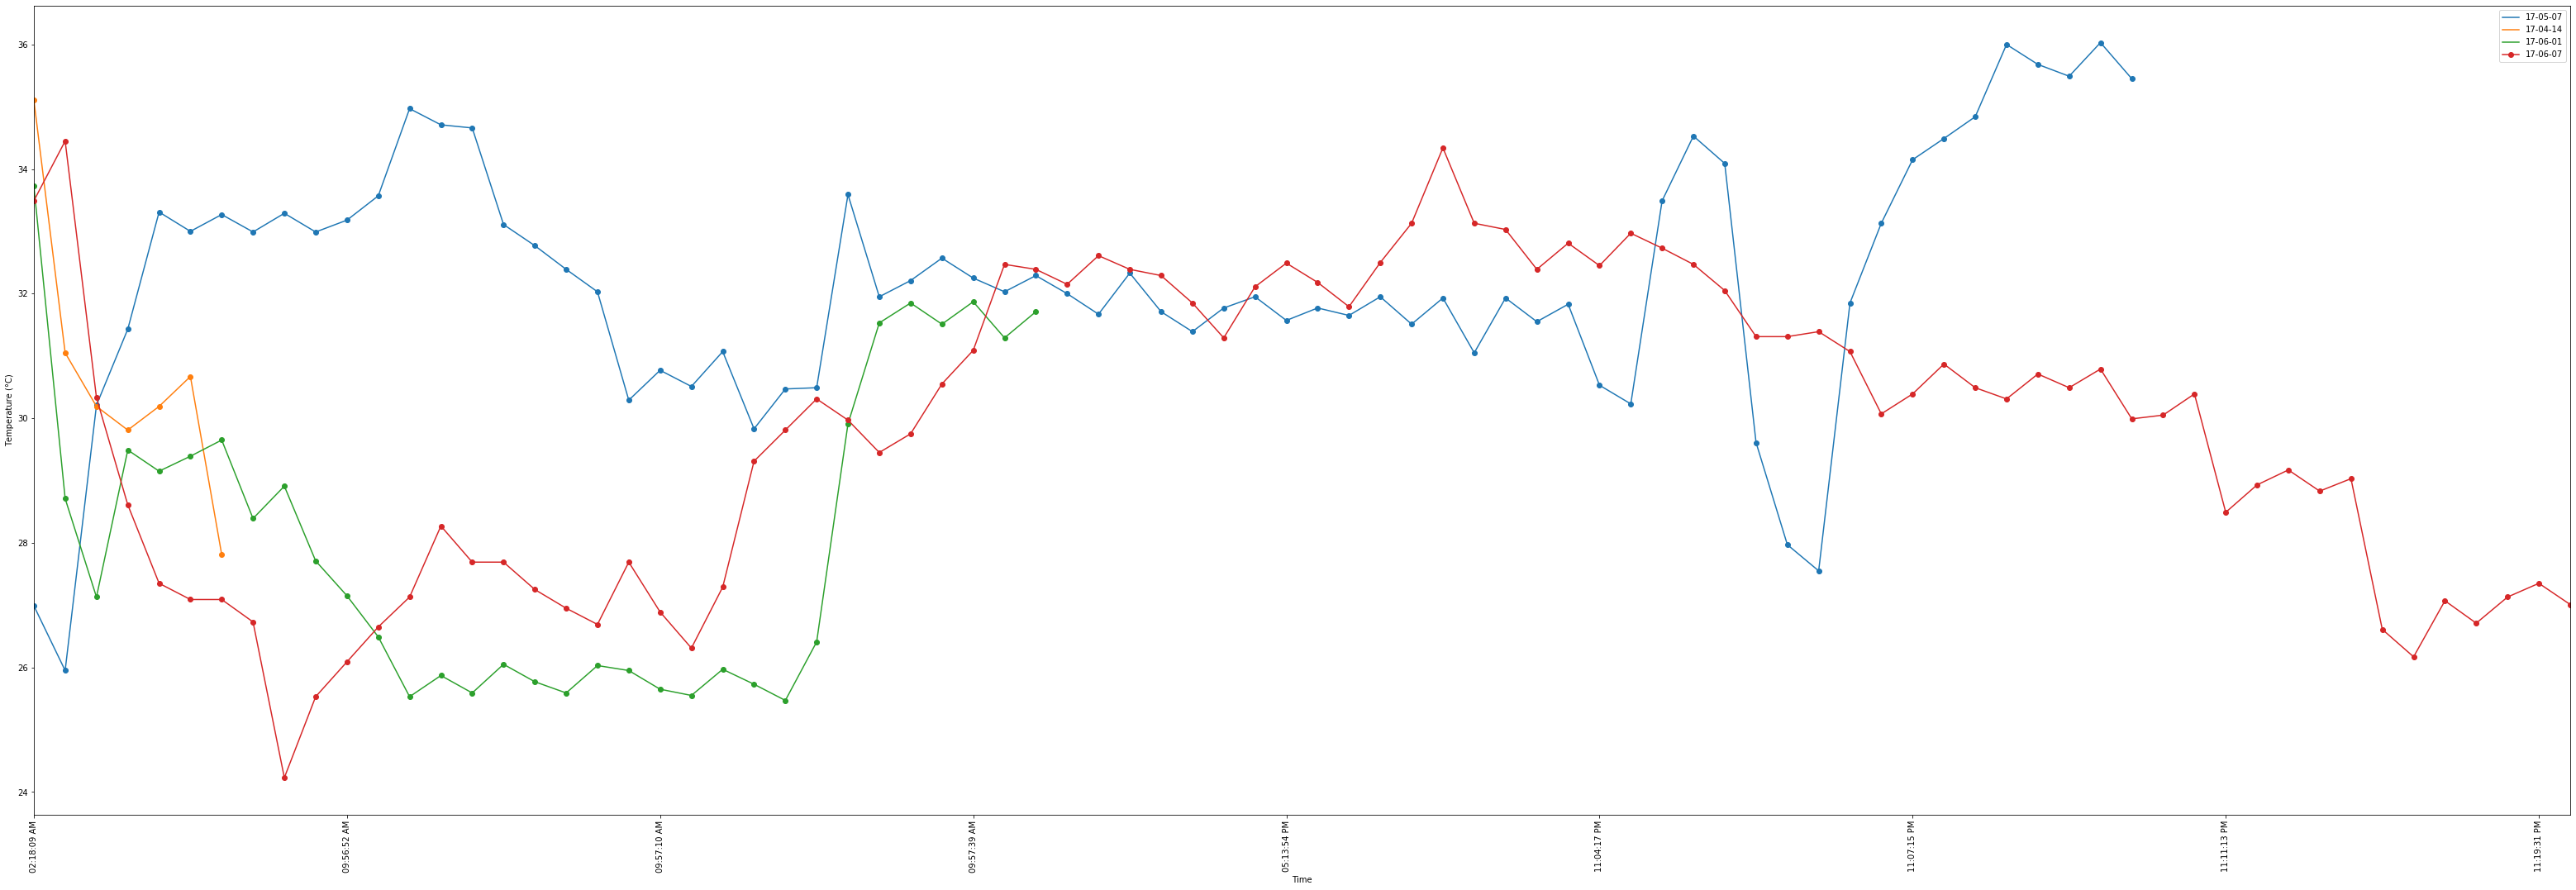

time_stamp   TEMP      date         time
1  1.491404e+09  33.18  17-04-05  08:21:40 PM
2  1.491406e+09  32.16  17-04-05  08:52:43 PM
3  1.491407e+09  31.95  17-04-05  09:08:03 PM
4  1.491408e+09  31.03  17-04-05  09:24:13 PM
5  1.491410e+09  30.61  17-04-05  09:58:44 PM

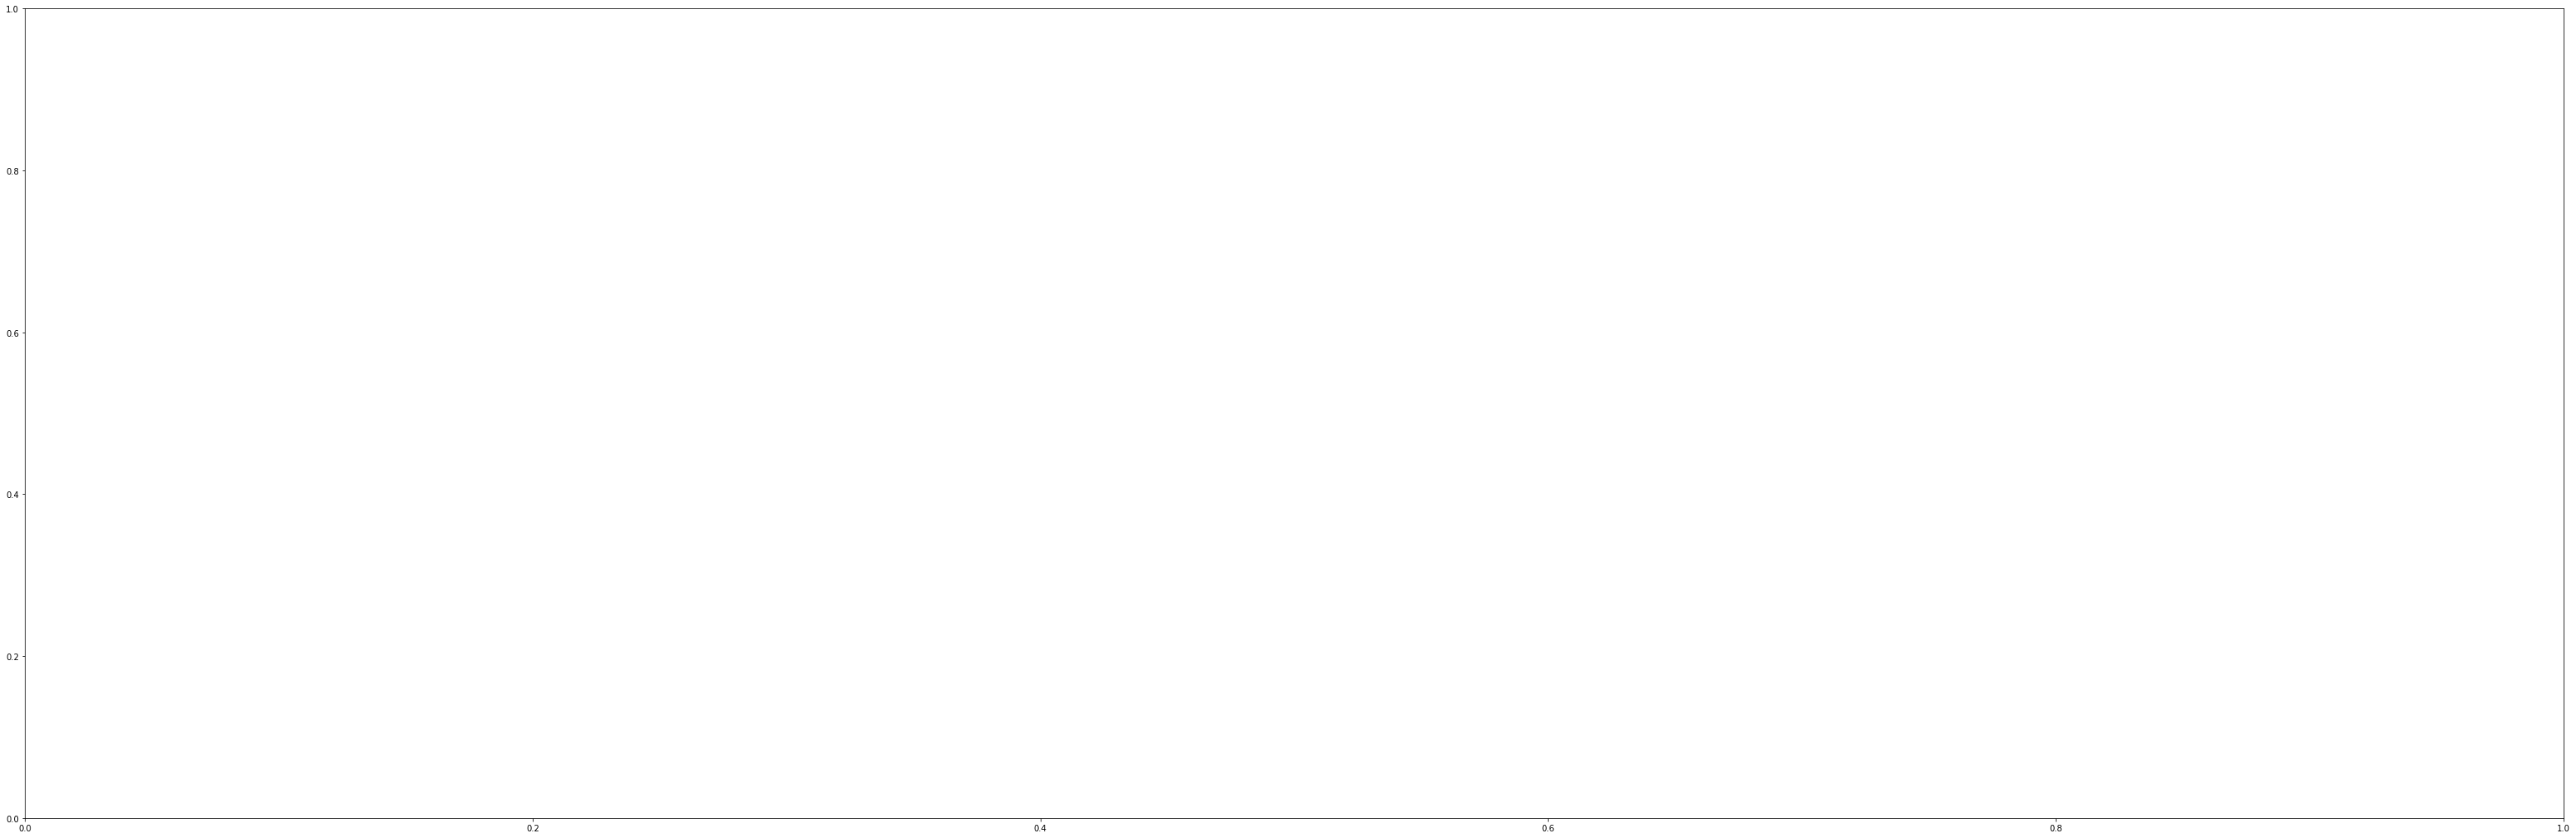

In [29]:
#Weekly
from datetime import time
df_sub = df_temp
# print(df_sub)
# times = [ "08:00", "23:00" ]
# newtime=[datetime.datetime.strptime(time, "%H:%M").strftime("%I:%M %p") for time in df_temp['time']]
# print(newtime)
hours = [time(hour = i).strftime(TIME_FORMAT) for i in range(24)]
all_dates = set(df_sub['date'])#Getting all dates
fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)
i = 0
for date in all_dates:
    print(type(date))
    df = df_sub[df_sub.date == date]
    df_sub['time'].describe()
    df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
    i=i+1   
    if i == 4:
        i = 0
        print(date)
        plot.xticks(rotation='vertical')
#         ax.set_xticks(ax.get_xticks()[::10])
        ax.set(xlabel="Time", ylabel="Temperature (°C)")
#         ax.set_xlim(pd.Timestamp('0:00'), pd.Timestamp('12:00'))
        plot.savefig('temp_graph_weekly'+date+'.png')
        plot.show()
        fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)
        break
#fig, ax = plot.subplots(figsize=(16,10))
#for label, df in df_sub.groupby('date'):
#    df_sub.plot(x = "time",y = 'TEMP',ax=ax, label=label)
#plot.legend()


df_temp.head(5)

In [14]:
d = datetime.strptime("10:30", "%H:%M")
d.strftime("%I:%M %p")
import datetime
def timeconvert(str1): 
   if str1[-2:] == "AM" and str1[:2] == "12": 
      return "00" + str1[2:-2] 
   elif str1[-2:] == "AM": 
      return str1[:-2] 
   elif str1[-2:] == "PM" and str1[:2] == "12": 
      return str1[:-2] 
   else: 
      return str(int(str1[:2]) + 12) + str1[2:8] 
dt=datetime.datetime.now()
print("Conversion Of Time ::",timeconvert(dt.strftime("%H:%M:%S"))) 

Conversion Of Time :: 27:30:28


      time_stamp   TEMP      date         time
1   1.491404e+09  33.18  17-04-05  08:21:40 PM
2   1.491406e+09  32.16  17-04-05  08:52:43 PM
3   1.491407e+09  31.95  17-04-05  09:08:03 PM
4   1.491408e+09  31.03  17-04-05  09:24:13 PM
5   1.491410e+09  30.61  17-04-05  09:58:44 PM
6   1.491410e+09  30.29  17-04-05  09:58:45 PM
7   1.491410e+09  29.81  17-04-05  09:58:51 PM
8   1.491410e+09  29.69  17-04-05  09:58:56 PM
9   1.491410e+09  30.01  17-04-05  09:59:03 PM
10  1.491410e+09  30.05  17-04-05  09:59:10 PM
11  1.491410e+09  29.75  17-04-05  09:59:11 PM
12  1.491410e+09  30.23  17-04-05  10:00:20 PM
13  1.491410e+09  29.81  17-04-05  10:01:31 PM
14  1.491410e+09  29.65  17-04-05  10:01:41 PM
15  1.491410e+09  29.31  17-04-05  10:01:43 PM
16  1.491410e+09  29.49  17-04-05  10:02:19 PM
17  1.491410e+09  29.17  17-04-05  10:02:20 PM
18  1.491412e+09  25.89  17-04-05  10:32:57 PM
19  1.491412e+09  24.21  17-04-05  10:32:58 PM
20  1.491412e+09  24.95  17-04-05  10:32:59 PM
21  1.491412e

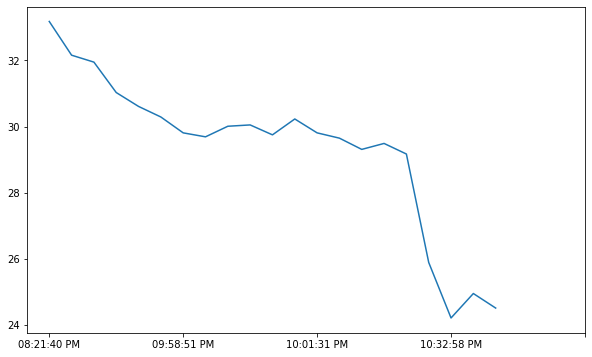

In [15]:
# example to plot every 4 hour with date range

import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import datetime as dt
# df_temp['date']
# fig, ax = plt.subplots()
# idx = pd.date_range('2017-04-05', '2017-04-12', freq='10min')
# generate a time range series with 10 min intervals
# idx = np.arange('2017-04-05T00', '2017-04-12T02', 10, dtype='datetime64[m]')
# some random data
# y = np.sin(np.arange(idx.shape[0]) / 0.01)

plt.figure(figsize=(10,6))
# figtemp, ax = plt.subplots(1, 1)
i=0
for date in df_temp['date']:
    df = df_sub[df_sub.date == date]

    if(i==10):
        print(df)
        plt.plot(df['time'],df['TEMP'],'-',label = date)
        xformatter = md.DateFormatter('%H:%M')
        xlocator = md.MinuteLocator(byminute=[0,15,30,45], interval=1)
#         xlocator = md.MinuteLocator(interval = 15)
#         times = [dt.datetime.strptime(str(i), '%H') for i in range(24)]
        plt.xticks([0,6,12,18,24])
        ## Set xtick labels to appear every 15 minutes
        ax.xaxis.set_major_locator(xlocator)
        plot.savefig('temp_graph_daily'+str(date)+'.png')
        ## Format xtick labels as HH:MM
#         plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
        
#         ax.set_xlim(['00:00:00','24:00:00'])

#         ax.xaxis.set_minor_locator(dates.HourLocator(interval=6))   # every 4 hours
#         ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
#         ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
#         ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y'))
        break
    i=i+1

# ax.plot_date(idx, y, '-')

# ax.xaxis.set_minor_locator(dates.HourLocator(interval=6))   # every 4 hours
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
# ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
# ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y'))

17-07-06


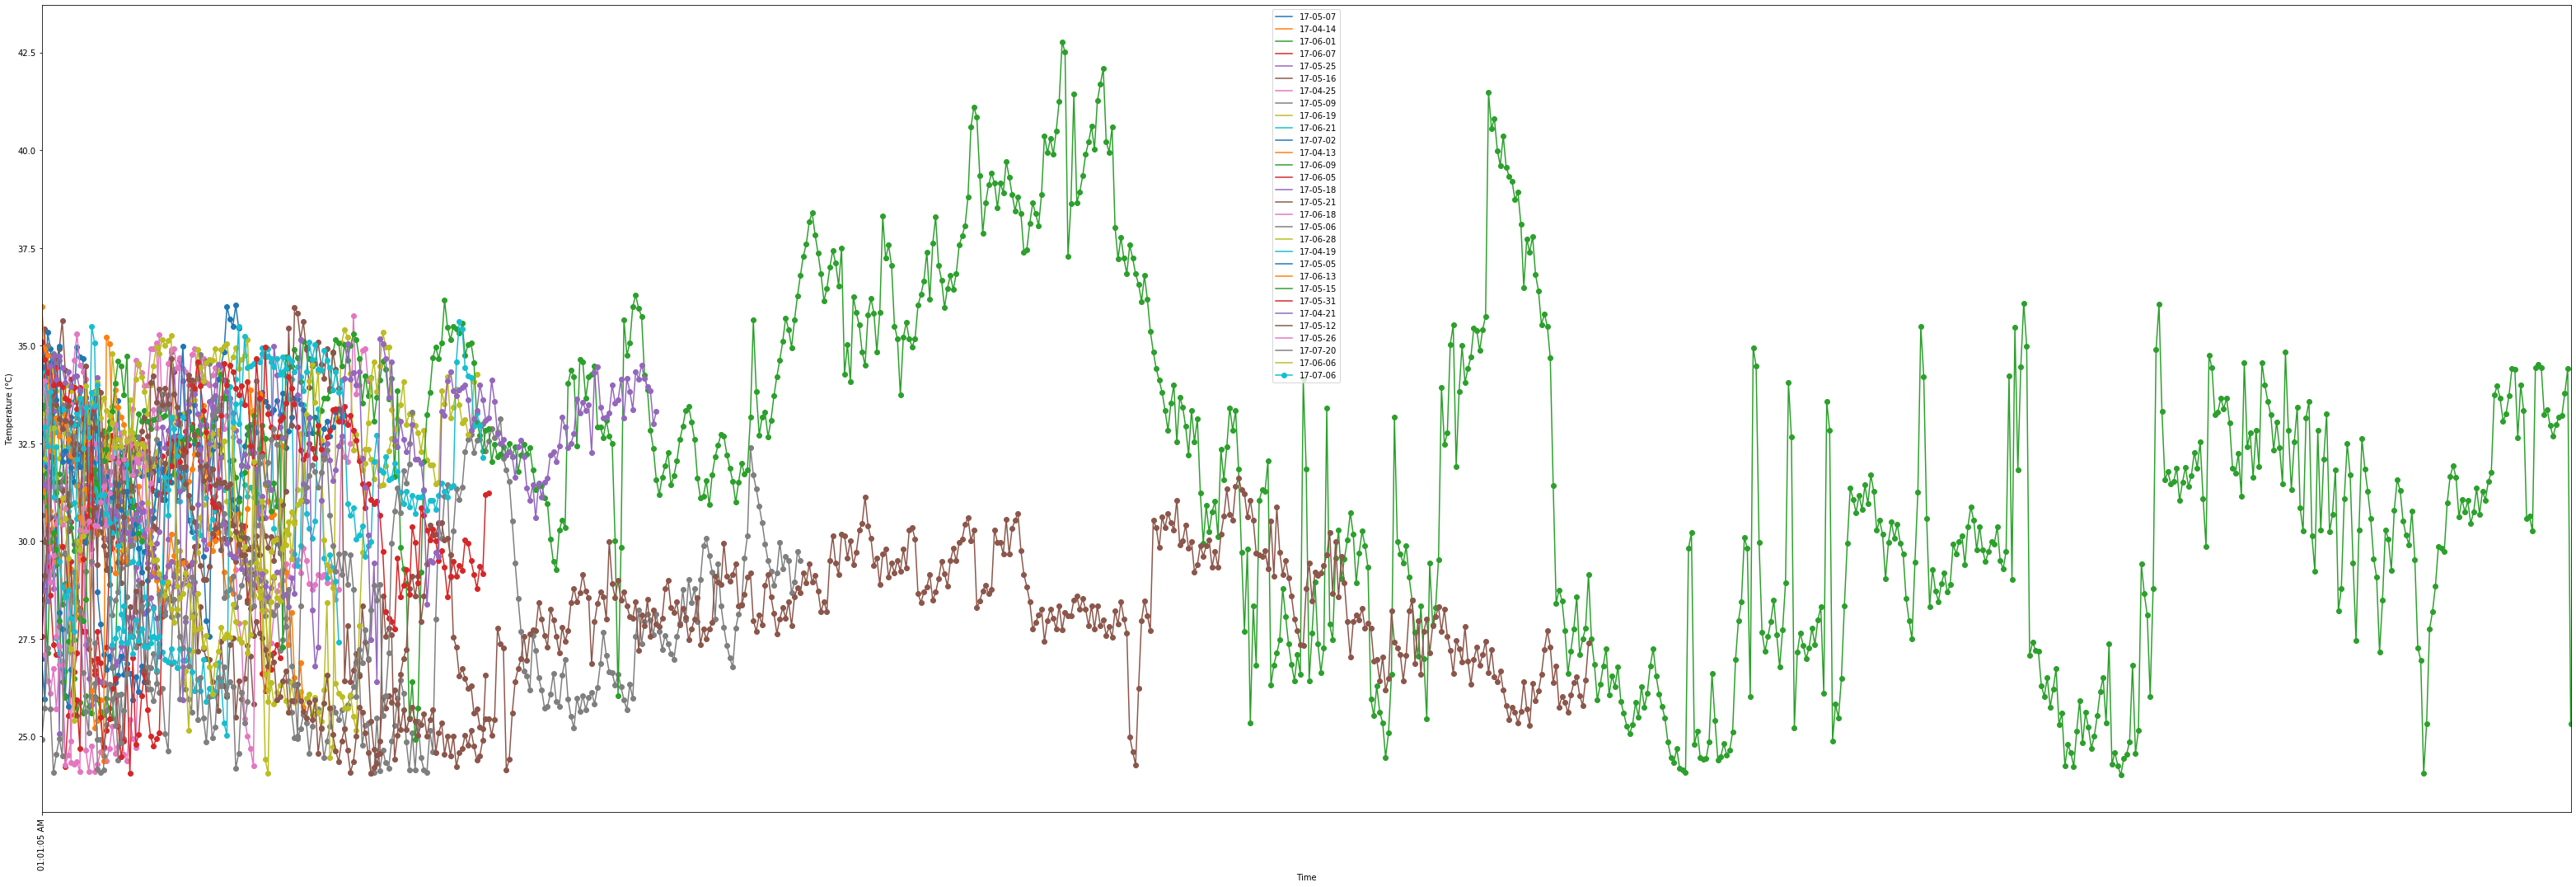

17-06-16


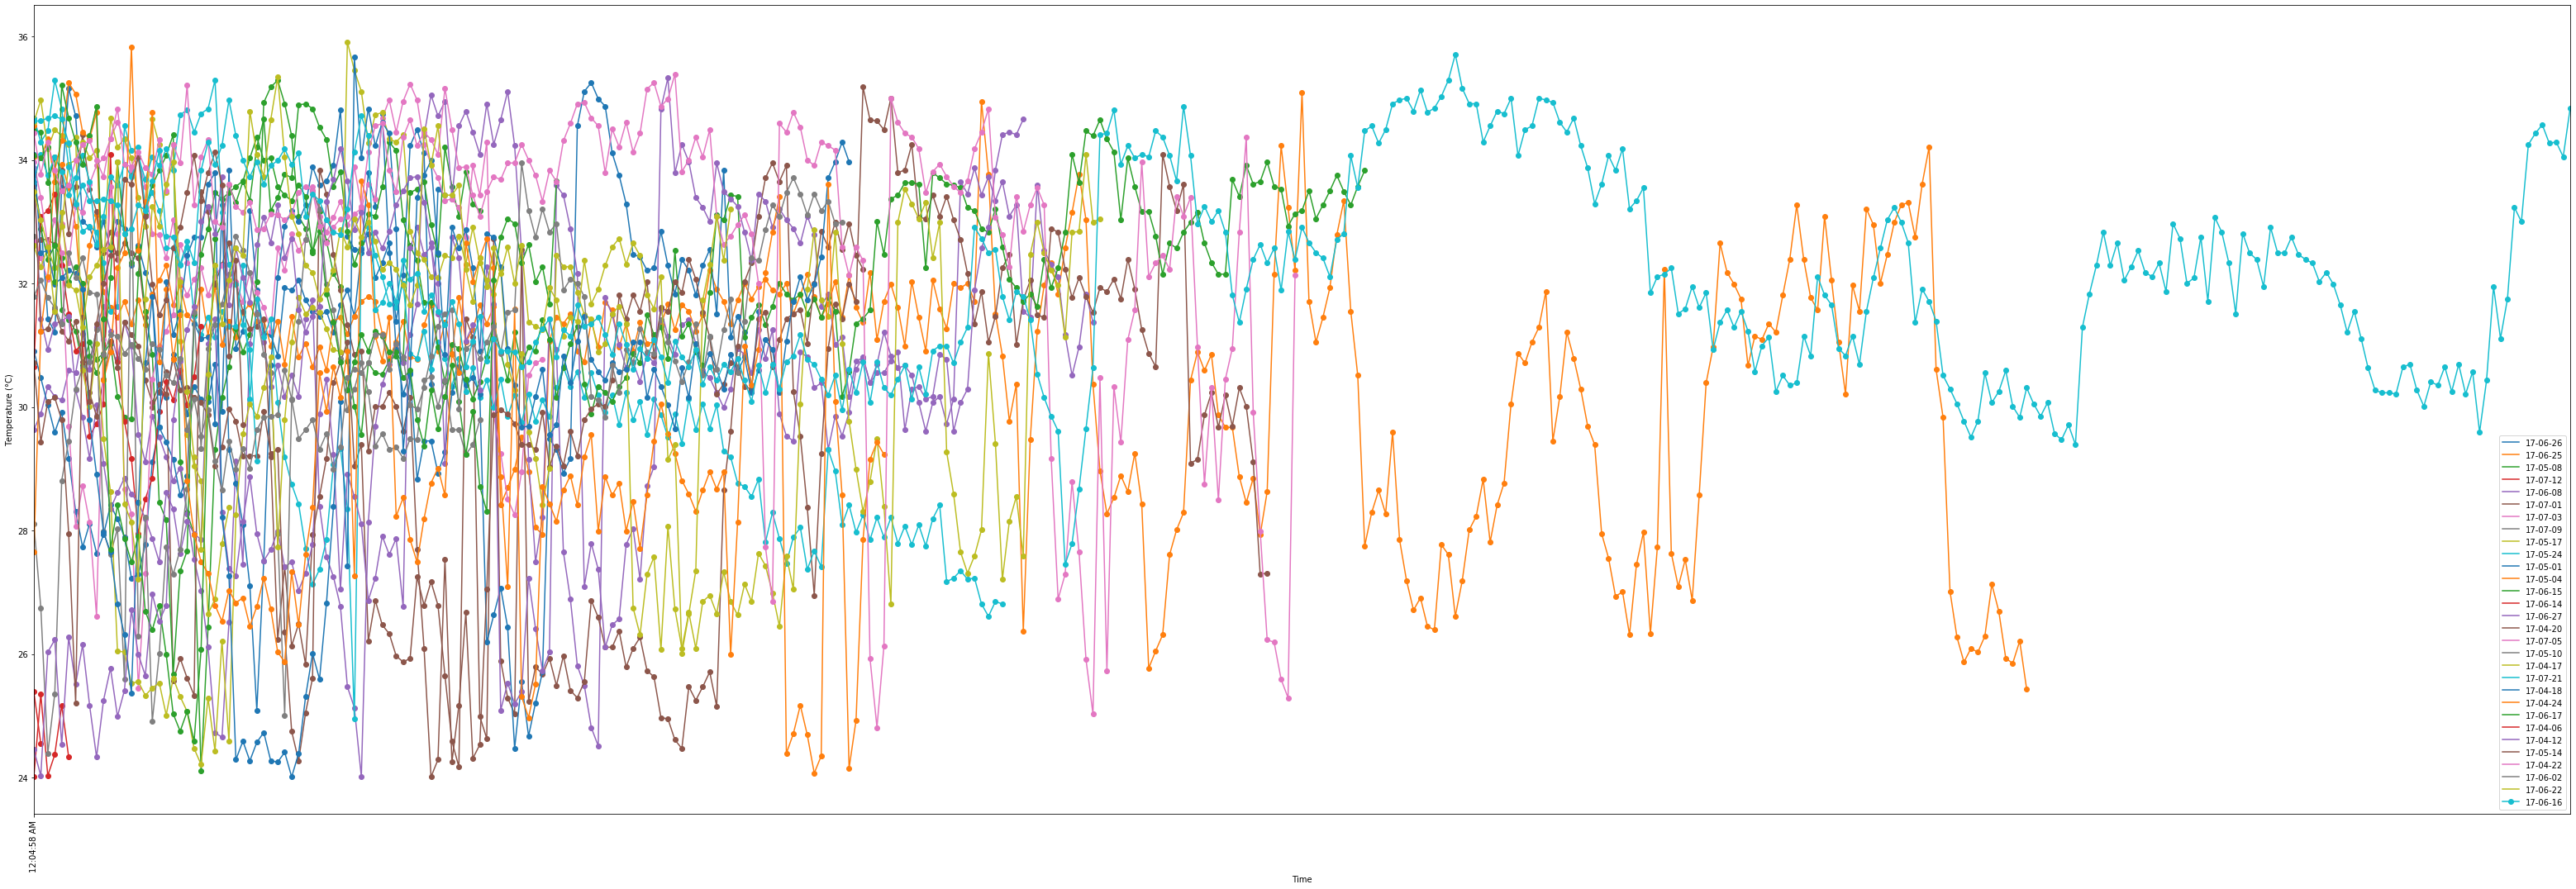

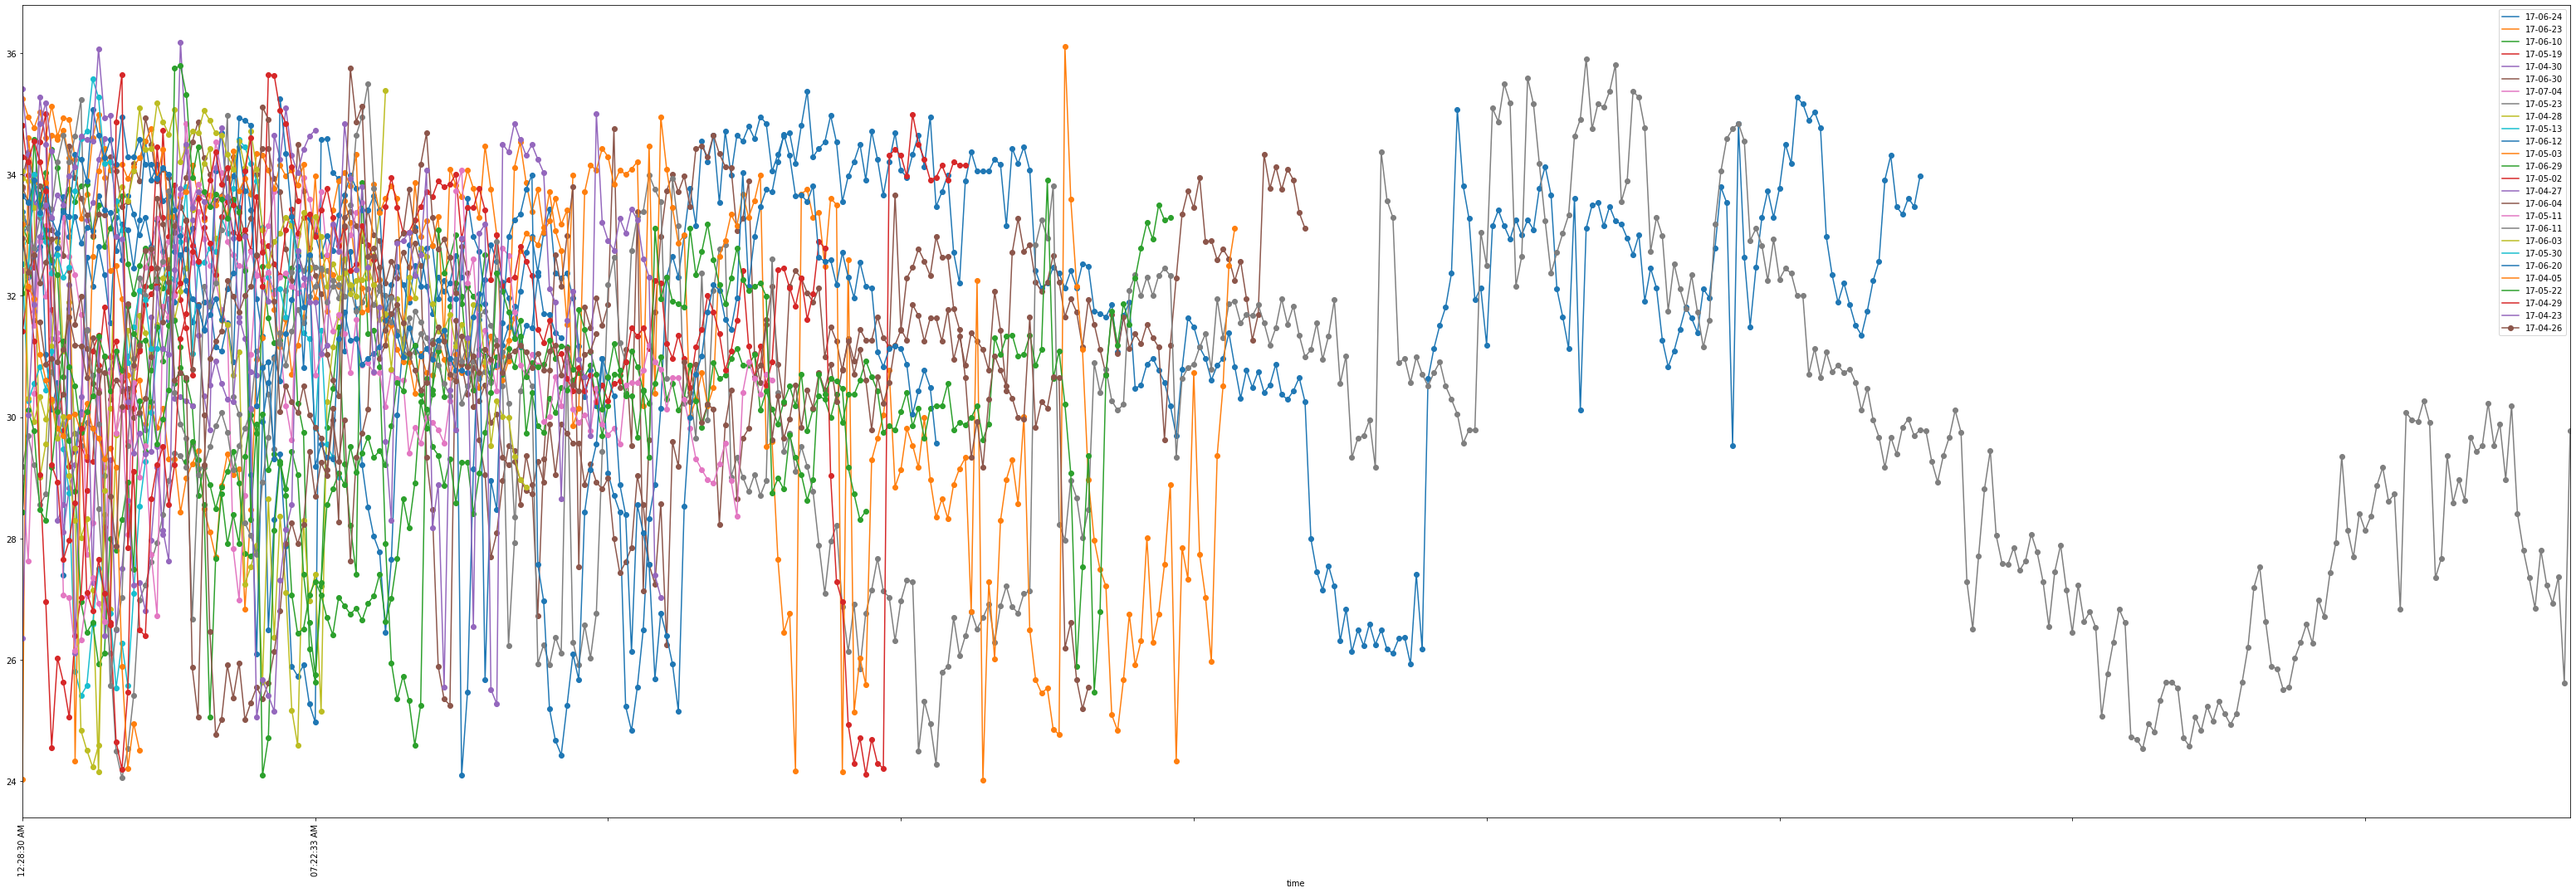

In [16]:
#Monthly
from datetime import time
df_sub = df_temp
hours = [time(hour = i).strftime(TIME_FORMAT) for i in range(24)]
all_dates = set(df_sub['date'])#Getting all dates
fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)
i = 0

for date in all_dates:
    df = df_sub[df_sub.date == date]
    #ax.plot(df.time, df.TEMP)
    #furqan changes for testing
    df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90, sharex=False)
    #original code
    #df.plot(x = "time", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90, sharex=False)
    #print(df['TEMP'].values)
    i=i+1
    if i == 30:
        i = 0
        print(date)
        #print(time)
#       plot.xticks(rotation='vertical')
        ax.set_xticks(ax.get_xticks()[::10])
        ax.set(xlabel="Time", ylabel="Temperature (°C)")
        plot.savefig('temp_graph_monthly'+str(date)+'.png')
        plot.show()
        fig, ax = plot.subplots(figsize=(55,18))#figsize=(15,15)


# EDA(Electrodermal Activity)

In [17]:
#Reading Electrodermal Activity Data
df_eda = get_all_data(dict_vars['EDA'])
df_eda.reset_index(inplace=True,drop=True)

File name:  sensor_data\A010e9_170413-003439 / EDA.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325832
File name:  sensor_data\A010e9_170417-154337 / EDA.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1958
File name:  sensor_data\A010e9_170420-130630 / EDA.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / EDA.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162272
File name:  sensor_data\A010e9_170421-133357 / EDA.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320738
File name:  sensor_data\A010e9_170422-121529 / EDA.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75056
File name:  sensor_data\A010e9_170422-172924 / EDA.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132638
File name:  sensor_data\A010e9_170423-024315 / EDA.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  180842
File 

File name:  sensor_data\A012ce_170420-114354 / EDA.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236966
File name:  sensor_data\A012ce_170421-041235 / EDA.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330332
File name:  sensor_data\A012ce_170422-122454 / EDA.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520112
File name:  sensor_data\A012ce_170424-010522 / EDA.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / EDA.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386084
File name:  sensor_data\A012ce_170427-031805 / EDA.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734240
File name:  sensor_data\A012ce_170429-152714 / EDA.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141728
File name:  sensor_data\A012ce_170430-143057 / EDA.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows:  139688


In [18]:
#Decribing Content of EDA
print("\nInitially Data Size: " , df_temperature.shape,"\n")
print("Diplaying top 10 values: ")
print(df_eda.head(10))
df_eda.describe()


Initially Data Size:  (32733920, 2) 

Diplaying top 10 values: 
     time_stamp       EDA
0  1.492044e+09  0.000000
1  1.492044e+09  0.540559
2  1.492044e+09  0.713487
3  1.492044e+09  1.080104
4  1.492044e+09  0.626718
5  1.492044e+09  0.679237
6  1.492044e+09  0.680518
7  1.492044e+09  0.658742
8  1.492044e+09  0.695889
9  1.492044e+09  0.709980


time_stamp           EDA
count  3.273439e+07  3.273439e+07
mean   1.495503e+09  4.757900e-01
std    2.349490e+06  1.182335e+00
min    1.491404e+09  0.000000e+00
25%    1.493329e+09  2.049100e-02
50%    1.495350e+09  1.613510e-01
75%    1.497788e+09  5.147540e-01
max    1.500599e+09  6.002896e+01

In [19]:
#Deleting outliers
print("Keeping Values between: ",dict_vars['EDA']['min']," and ",dict_vars['EDA']['max'])
df_eda = df_eda[(df_eda.EDA >= dict_vars['EDA']['min']) &
                                (df_eda.EDA <= dict_vars['EDA']['max'])] #Only keeping values lower than 200

Keeping Values between:  1.0  and  20.0


Data Size after removing outliers(3331096, 2)


time_stamp           EDA
count  3.331096e+06  3.331096e+06
mean   1.495881e+09  2.491645e+00
std    2.117083e+06  2.138659e+00
min    1.491404e+09  1.000203e+00
25%    1.493718e+09  1.302822e+00
50%    1.496302e+09  1.797277e+00
75%    1.497259e+09  2.786763e+00
max    1.500599e+09  1.999940e+01

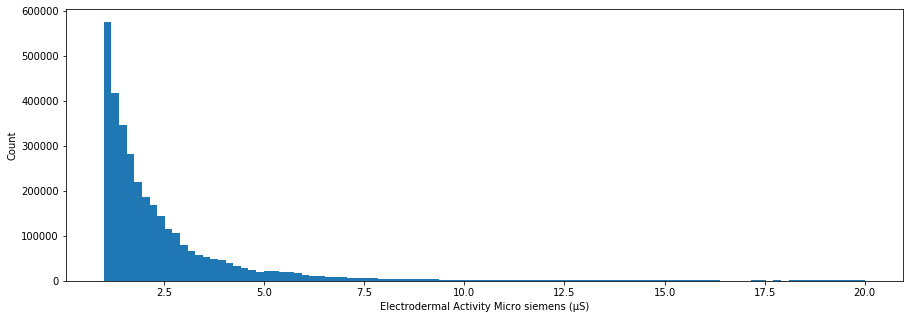

In [20]:
#Displaying Bar Graph of Count
display_frequency_bar_chart(df_eda['EDA'],"Electrodermal Activity Micro siemens (μS)","Count")
print("Data Size after removing outliers" + str(df_eda.shape))
df_eda.describe()

# Heart Rate

In [21]:
#Reading HR Data
df_hr = get_all_data(dict_vars['HR'])
df_hr.reset_index(inplace=True,drop=True)

File name:  sensor_data\A010e9_170413-003439 / HR.csv , Initial Time:  1492043689.0 , Frequency:  1.0 , No of Rows:  81450
File name:  sensor_data\A010e9_170417-154337 / HR.csv , Initial Time:  1492443827.0 , Frequency:  1.0 , No of Rows:  482
File name:  sensor_data\A010e9_170420-130630 / HR.csv , Initial Time:  1492693600.0 , Frequency:  1.0 , No of Rows:  329
File name:  sensor_data\A010e9_170421-001318 / HR.csv , Initial Time:  1492733608.0 , Frequency:  1.0 , No of Rows:  40561
File name:  sensor_data\A010e9_170421-133357 / HR.csv , Initial Time:  1492781647.0 , Frequency:  1.0 , No of Rows:  80176
File name:  sensor_data\A010e9_170422-121529 / HR.csv , Initial Time:  1492863339.0 , Frequency:  1.0 , No of Rows:  18757
File name:  sensor_data\A010e9_170422-172924 / HR.csv , Initial Time:  1492882174.0 , Frequency:  1.0 , No of Rows:  33152
File name:  sensor_data\A010e9_170423-024315 / HR.csv , Initial Time:  1492915405.0 , Frequency:  1.0 , No of Rows:  45203
File name:  sensor_d

File name:  sensor_data\A012ce_170421-041235 / HR.csv , Initial Time:  1492747965.0 , Frequency:  1.0 , No of Rows:  82576
File name:  sensor_data\A012ce_170422-122454 / HR.csv , Initial Time:  1492863904.0 , Frequency:  1.0 , No of Rows:  130021
File name:  sensor_data\A012ce_170424-010522 / HR.csv , Initial Time:  1492995932.0 , Frequency:  1.0 , No of Rows:  118834
File name:  sensor_data\A012ce_170425-104408 / HR.csv , Initial Time:  1493117058.0 , Frequency:  1.0 , No of Rows:  96513
File name:  sensor_data\A012ce_170427-031805 / HR.csv , Initial Time:  1493263095.0 , Frequency:  1.0 , No of Rows:  183552
File name:  sensor_data\A012ce_170429-152714 / HR.csv , Initial Time:  1493479644.0 , Frequency:  1.0 , No of Rows:  35425
File name:  sensor_data\A012ce_170430-143057 / HR.csv , Initial Time:  1493562667.0 , Frequency:  1.0 , No of Rows:  34915
File name:  sensor_data\A012ce_170501-013011 / HR.csv , Initial Time:  1493602221.0 , Frequency:  1.0 , No of Rows:  186173
File name:  

In [22]:
#Decribing Content of HR
print("\nInitially Data Size: " , df_hr.shape,"\n")
print("Diplaying top 10 values: ")
print(df_hr.head(10))
df_hr.describe()


Initially Data Size:  (8182661, 2) 

Diplaying top 10 values: 
     time_stamp     HR
0  1.492044e+09  49.00
1  1.492044e+09  53.00
2  1.492044e+09  56.33
3  1.492044e+09  58.00
4  1.492044e+09  59.00
5  1.492044e+09  64.17
6  1.492044e+09  67.43
7  1.492044e+09  69.50
8  1.492044e+09  71.44
9  1.492044e+09  73.10


time_stamp            HR
count  8.182661e+06  8.182661e+06
mean   1.495503e+09  8.893211e+01
std    2.349482e+06  2.918148e+01
min    1.491404e+09  4.198000e+01
25%    1.493329e+09  6.922000e+01
50%    1.495350e+09  7.985000e+01
75%    1.497788e+09  1.002500e+02
max    1.500599e+09  2.127300e+02

Data Size(8182661, 2)


time_stamp            HR
count  8.182661e+06  8.182661e+06
mean   1.495503e+09  8.893211e+01
std    2.349482e+06  2.918148e+01
min    1.491404e+09  4.198000e+01
25%    1.493329e+09  6.922000e+01
50%    1.495350e+09  7.985000e+01
75%    1.497788e+09  1.002500e+02
max    1.500599e+09  2.127300e+02

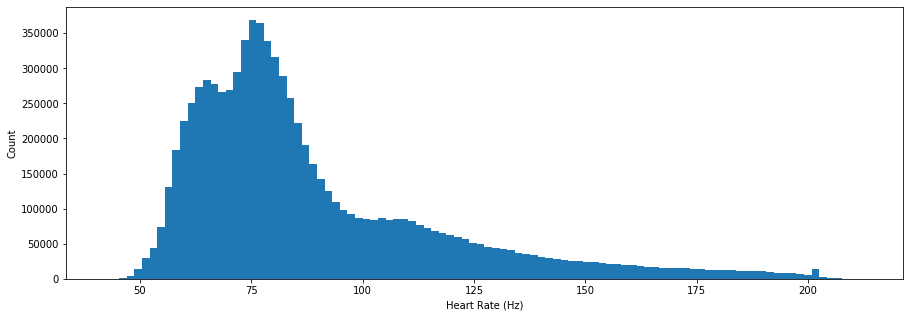

In [23]:
#Displaying Bar Graph of Count
display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
print("Data Size" + str(df_hr.shape))
df_hr.describe()

# BVP

In [24]:
#Reading BVP Data
df_bvp = get_all_data(dict_vars['BVP'])
df_bvp.reset_index(inplace=True,drop=True)

File name:  sensor_data\A010e9_170413-003439 / BVP.csv , Initial Time:  1492043679.0 , Frequency:  64.0 , No of Rows:  5213265
File name:  sensor_data\A010e9_170417-154337 / BVP.csv , Initial Time:  1492443817.0 , Frequency:  64.0 , No of Rows:  31330
File name:  sensor_data\A010e9_170420-130630 / BVP.csv , Initial Time:  1492693590.0 , Frequency:  64.0 , No of Rows:  21507
File name:  sensor_data\A010e9_170421-001318 / BVP.csv , Initial Time:  1492733598.0 , Frequency:  64.0 , No of Rows:  2596387
File name:  sensor_data\A010e9_170421-133357 / BVP.csv , Initial Time:  1492781637.0 , Frequency:  64.0 , No of Rows:  5131766
File name:  sensor_data\A010e9_170422-121529 / BVP.csv , Initial Time:  1492863329.0 , Frequency:  64.0 , No of Rows:  1200927
File name:  sensor_data\A010e9_170422-172924 / BVP.csv , Initial Time:  1492882164.0 , Frequency:  64.0 , No of Rows:  2122188
File name:  sensor_data\A010e9_170423-024315 / BVP.csv , Initial Time:  1492915395.0 , Frequency:  64.0 , No of Row

MemoryError: 

In [ ]:
#Decribing Content of BVP
print("\nInitially Data Size: " , df_bvp.shape,"\n")
print("Diplaying top 10 values: ")
print(df_bvp.head(10))
df_bvp.describe()

In [ ]:
#Displaying Bar Graph of Count
display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
print("Data Size" + str(df_hr.shape))
df_bvp.describe()

# Accelerometer

In [ ]:
#Reading Accelerometer Data
df_bvp = get_all_data(dict_vars['BVP'])
df_bvp.reset_index(inplace=True,drop=True)